#### **Importing libraries**

In [5]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

#### **Mounting Gdrive to access files**

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


#### **Reading the Data set**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/ecom-elasticity-data1.tsv", sep='\t', header=None, names=["item_id", "category", "date", "avg_price", "units_sold"])
df

,item_id,category,date,avg_price,units_sold
0,D9775,Diapers,2017-01-01,12.46,94
1,D80,Diapers,2017-01-01,11.56,102
2,D3248,Diapers,2017-01-01,12.21,93
3,D1714,Diapers,2017-01-01,11.54,75
4,D1408,Diapers,2017-01-01,13.16,94
...,...,...,...,...,...
461995,C9059,Cereals,2020-01-05,9.37,21
461996,C2753,Cereals,2020-01-05,8.96,24
461997,C7600,Cereals,2020-01-05,8.63,26
461998,C510,Cereals,2020-01-05,8.89,24


#### **Data exploration**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462000 entries, 0 to 461999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     462000 non-null  object 
 1   category    462000 non-null  object 
 2   date        462000 non-null  object 
 3   avg_price   462000 non-null  float64
 4   units_sold  462000 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.6+ MB


In [9]:
diaper_df = df[df['category'] == 'Diapers']
diaper_df


,item_id,category,date,avg_price,units_sold
0,D9775,Diapers,2017-01-01,12.46,94
1,D80,Diapers,2017-01-01,11.56,102
2,D3248,Diapers,2017-01-01,12.21,93
3,D1714,Diapers,2017-01-01,11.54,75
4,D1408,Diapers,2017-01-01,13.16,94
...,...,...,...,...,...
461675,D2391,Diapers,2020-01-05,8.70,15
461676,D9687,Diapers,2020-01-05,6.67,29
461677,D8075,Diapers,2020-01-05,9.35,11
461678,D9378,Diapers,2020-01-05,7.08,31


In [10]:
diaper_df.reset_index(drop=True)

,item_id,category,date,avg_price,units_sold
0,D9775,Diapers,2017-01-01,12.46,94
1,D80,Diapers,2017-01-01,11.56,102
2,D3248,Diapers,2017-01-01,12.21,93
3,D1714,Diapers,2017-01-01,11.54,75
4,D1408,Diapers,2017-01-01,13.16,94
...,...,...,...,...,...
109995,D2391,Diapers,2020-01-05,8.70,15
109996,D9687,Diapers,2020-01-05,6.67,29
109997,D8075,Diapers,2020-01-05,9.35,11
109998,D9378,Diapers,2020-01-05,7.08,31


In [11]:
# listing out all the unique item_ids'
np.unique(diaper_df['item_id'])

array(['D1036', 'D1053', 'D1207', 'D1211', 'D1278', 'D131', 'D1322',
       'D1346', 'D1349', 'D1408', 'D1425', 'D1454', 'D1515', 'D1714',
       'D1938', 'D1963', 'D2050', 'D2092', 'D2096', 'D2391', 'D2587',
       'D268', 'D2786', 'D2927', 'D3029', 'D306', 'D3078', 'D3108',
       'D3237', 'D3248', 'D3307', 'D3684', 'D3864', 'D4192', 'D4231',
       'D4263', 'D4389', 'D4436', 'D4564', 'D4595', 'D4670', 'D4687',
       'D4844', 'D506', 'D5111', 'D5119', 'D5156', 'D5374', 'D5491',
       'D5574', 'D559', 'D5674', 'D5826', 'D5991', 'D6035', 'D6230',
       'D6247', 'D6346', 'D6573', 'D6836', 'D6853', 'D6897', 'D6936',
       'D702', 'D7147', 'D718', 'D7274', 'D7328', 'D7329', 'D7511',
       'D7680', 'D7689', 'D7734', 'D7755', 'D7870', 'D7938', 'D796',
       'D80', 'D8075', 'D8085', 'D8139', 'D8141', 'D8200', 'D8421',
       'D8500', 'D8542', 'D8755', 'D8829', 'D8861', 'D8876', 'D9378',
       'D9387', 'D9492', 'D9604', 'D9687', 'D9761', 'D9775', 'D9904',
       'D9927', 'D9976'], dtyp

In [12]:
# listing out the counts of each unique item_ids'
diaper_df['item_id'].value_counts()

D9775    1100
D2092    1100
D8876    1100
D3108    1100
D7680    1100
         ... 
D8500    1100
D6936    1100
D8200    1100
D7511    1100
D1349    1100
Name: item_id, Length: 100, dtype: int64

In [13]:
# filtering out a particular (item with id D9775) item for data exploration
D9775_diaper_df = diaper_df[diaper_df['item_id'] == 'D9775']
D9775_diaper_df

,item_id,category,date,avg_price,units_sold
0,D9775,Diapers,2017-01-01,12.46,94
420,D9775,Diapers,2017-01-02,14.12,40
840,D9775,Diapers,2017-01-03,11.72,32
1260,D9775,Diapers,2017-01-04,9.37,24
1680,D9775,Diapers,2017-01-05,12.60,35
...,...,...,...,...,...
459900,D9775,Diapers,2020-01-01,10.12,74
460320,D9775,Diapers,2020-01-02,12.49,53
460740,D9775,Diapers,2020-01-03,12.45,73
461160,D9775,Diapers,2020-01-04,14.16,100


In [14]:
D9775_diaper_df.to_csv("data_exploration1.csv")

### **Scattered plot**
for the relation between Units sold and Average price for a particular item_id


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

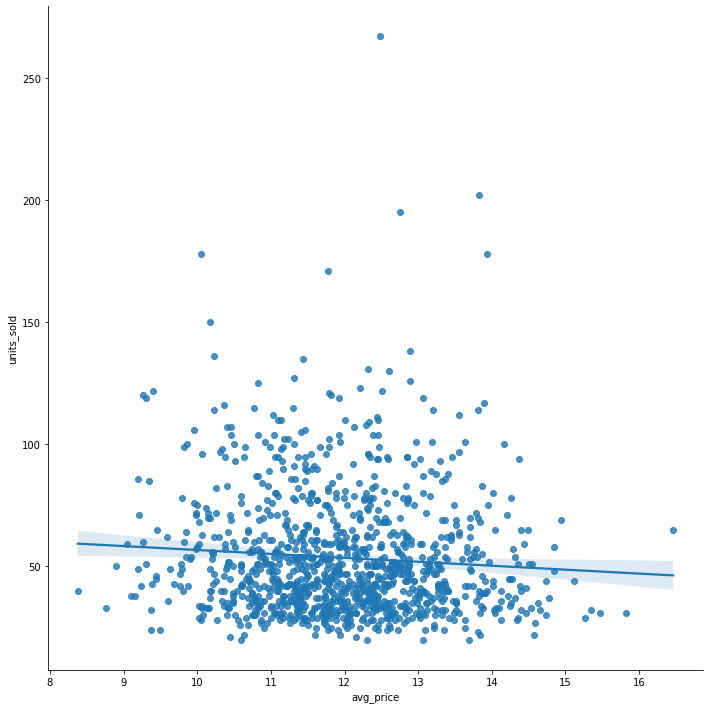

In [15]:
sns.pairplot(D9775_diaper_df, kind = 'reg', size = 10, x_vars = ['avg_price'], y_vars = ['units_sold'])
plt.show


In [16]:
# sns.pairplot(D9775_diaper_df, kind = 'reg', size = 10, x_vars = ['avg_price'], y_vars = ['units_sold'])
# plt.show

In [17]:
# Ordinary Least Squares (OLS) Estimation
warnings.filterwarnings('ignore')
lm = smf.ols('np.log(units_sold) ~ np.log(avg_price)', data = D9775_diaper_df).fit()
# log-log linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(units_sold)   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.533
Date:                Wed, 07 Sep 2022   Prob (F-statistic):            0.00356
Time:                        08:43:45   Log-Likelihood:                -568.65
No. Observations:                1100   AIC:                             1141.
Df Residuals:                    1098   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7825      0.305     15.676      0.000       4.184       5.381
np.log(avg_price)    -0.3594      0.123     -2.921      0.004      -0.601      -0.118
==============================================================================
Omnibus:                       44.232   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.838
Skew:                           0.515   Prob(JB):                     2.48e-11
Kurtosis:                       3.055   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# calculation of % change in demand
D9775_diaper_df["% Change in Demand"] = D9775_diaper_df["units_sold"].pct_change()
D9775_diaper_df

,item_id,category,date,avg_price,units_sold,% Change in Demand
0,D9775,Diapers,2017-01-01,12.46,94,NaN
420,D9775,Diapers,2017-01-02,14.12,40,-0.574468
840,D9775,Diapers,2017-01-03,11.72,32,-0.200000
1260,D9775,Diapers,2017-01-04,9.37,24,-0.250000
1680,D9775,Diapers,2017-01-05,12.60,35,0.458333
...,...,...,...,...,...,...
459900,D9775,Diapers,2020-01-01,10.12,74,0.072464
460320,D9775,Diapers,2020-01-02,12.49,53,-0.283784
460740,D9775,Diapers,2020-01-03,12.45,73,0.377358
461160,D9775,Diapers,2020-01-04,14.16,100,0.369863


In [19]:
# calculation of % change in price
D9775_diaper_df["% Change in Price"] = D9775_diaper_df["avg_price"].pct_change()
D9775_diaper_df

,item_id,category,date,avg_price,units_sold,% Change in Demand,% Change in Price
0,D9775,Diapers,2017-01-01,12.46,94,NaN,NaN
420,D9775,Diapers,2017-01-02,14.12,40,-0.574468,0.133226
840,D9775,Diapers,2017-01-03,11.72,32,-0.200000,-0.169972
1260,D9775,Diapers,2017-01-04,9.37,24,-0.250000,-0.200512
1680,D9775,Diapers,2017-01-05,12.60,35,0.458333,0.344717
...,...,...,...,...,...,...,...
459900,D9775,Diapers,2020-01-01,10.12,74,0.072464,-0.066421
460320,D9775,Diapers,2020-01-02,12.49,53,-0.283784,0.234190
460740,D9775,Diapers,2020-01-03,12.45,73,0.377358,-0.003203
461160,D9775,Diapers,2020-01-04,14.16,100,0.369863,0.137349


In [20]:
# calculation for Price elasticity 
D9775_diaper_df["Price Elasticity"] = D9775_diaper_df["% Change in Demand"] / D9775_diaper_df["% Change in Price"]
D9775_diaper_df

,item_id,category,date,avg_price,units_sold,% Change in Demand,% Change in Price,Price Elasticity
0,D9775,Diapers,2017-01-01,12.46,94,NaN,NaN,NaN
420,D9775,Diapers,2017-01-02,14.12,40,-0.574468,0.133226,-4.311971
840,D9775,Diapers,2017-01-03,11.72,32,-0.200000,-0.169972,1.176667
1260,D9775,Diapers,2017-01-04,9.37,24,-0.250000,-0.200512,1.246809
1680,D9775,Diapers,2017-01-05,12.60,35,0.458333,0.344717,1.329592
...,...,...,...,...,...,...,...,...
459900,D9775,Diapers,2020-01-01,10.12,74,0.072464,-0.066421,-1.090982
460320,D9775,Diapers,2020-01-02,12.49,53,-0.283784,0.234190,-1.211769
460740,D9775,Diapers,2020-01-03,12.45,73,0.377358,-0.003203,-117.830189
461160,D9775,Diapers,2020-01-04,14.16,100,0.369863,0.137349,2.692862


In [88]:
def OLS_Calculation(item_level_category_df):
  warnings.filterwarnings('ignore')
  lm = smf.ols('np.log(units_sold) ~ np.log(avg_price)', data = item_level_category_df).fit()
  return lm.summary()

In [89]:
def priceElasticityCalculation(category_df, item_id):
  item_level_category_df = category_df[category_df['item_id'] == item_id]
  item_level_category_df["% Change in Demand"] = item_level_category_df["units_sold"].pct_change()
  item_level_category_df["% Change in Price"] = item_level_category_df["avg_price"].pct_change()
  item_level_category_df["Price Elasticity"] = item_level_category_df["% Change in Demand"] / item_level_category_df["% Change in Price"]
  
  item_level_category_df.reset_index(drop=True)
  return item_level_category_df

In [93]:
# DRY (Don't repeat yourself) approach to draw plot categorywise 
def exploreCategoryWise(category):
  category_df = df[df['category'] == category]
  unique_item_ids = np.unique(category_df['item_id'])[:3]

  for item_id in unique_item_ids:
    item_level_category_df = category_df[category_df['item_id'] == item_id]
    sns.pairplot(item_level_category_df, kind = 'reg', size = 5, x_vars = ['avg_price'], y_vars = ['units_sold']).set(title=f'item_id is: {item_id}')
    plt.show

  combined_item_df = []
  
  for item_id in unique_item_ids:
    combined_item_df.append(priceElasticityCalculation(category_df, item_id))
  
  for item_id in unique_item_ids:
    item_level_category_df = category_df[category_df['item_id'] == item_id]
    print(OLS_Calculation(item_level_category_df))
  
  return combined_item_df
    

                            OLS Regression Results                            
Dep. Variable:     np.log(units_sold)   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     386.7
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           5.38e-74
Time:                        09:47:49   Log-Likelihood:                -561.34
No. Observations:                1100   AIC:                             1127.
Df Residuals:                    1098   BIC:                             1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.2685      0.61

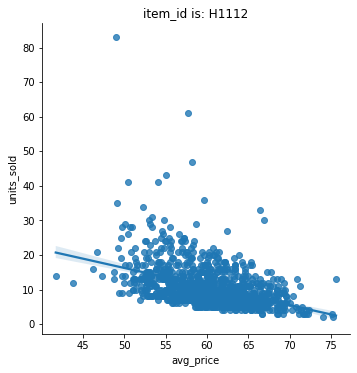

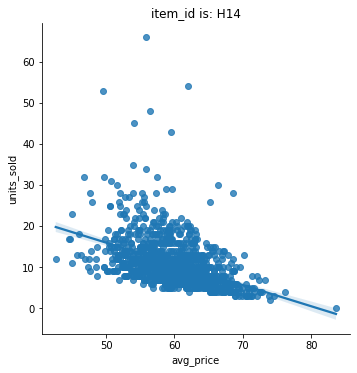

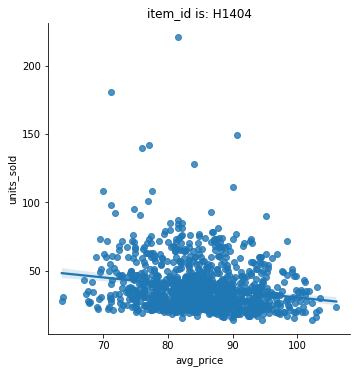

In [94]:
item1_df, item2_df, item3_df = exploreCategoryWise('Headphones')

In [92]:
item1_df.reset_index(drop=True)
item2_df.reset_index(drop=True)
item3_df.reset_index(drop=True)
print(item1_df, item2_df, item3_df, end="\n-----------------------------------------------------------------------------------------------\n")

       item_id    category        date  avg_price  units_sold  \
193      H1112  Headphones  2017-01-01      68.59          11   
613      H1112  Headphones  2017-01-02      59.01           8   
1033     H1112  Headphones  2017-01-03      65.35           6   
1453     H1112  Headphones  2017-01-04      75.08           3   
1873     H1112  Headphones  2017-01-05      59.62           9   
...        ...         ...         ...        ...         ...   
460093   H1112  Headphones  2020-01-01      61.35          12   
460513   H1112  Headphones  2020-01-02      53.85          20   
460933   H1112  Headphones  2020-01-03      64.91          12   
461353   H1112  Headphones  2020-01-04      65.31          18   
461773   H1112  Headphones  2020-01-05      58.65          29   

        % Change in Demand  % Change in Price  Price Elasticity  
193                    NaN                NaN               NaN  
613              -0.272727          -0.139671          1.952648  
1033             -0.2